## 1. Import Package

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

## 2. Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

#Read dataset
#import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataTubes1.csv')
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataTubes2.csv')
df3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataTubes3.csv')
#df = pd.read_csv('DataTubes.csv')
df

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Kelurahan,Jumlah_sasaran_ibu_hamil,Jumlah_sasaran_ibu_bersalin,Jumlah_sasaran_kelahiran_hidup,Jumlah_sasaran_bayi,Jumlah_sasaran_balita
0,Kandangan,512,489,465,495,1843
1,Romokalisari,45,43,42,44,226
2,Tambak Oso Wilangon,57,54,52,55,317
3,Pakal,158,151,144,153,786
4,Babat Jerawat,324,309,294,313,1659
...,...,...,...,...,...,...
149,Siwalankerto,256,245,233,248,1243
150,Kebonsari,169,161,153,163,828
151,Pagesangan,221,211,202,214,1082
152,Jambangan,179,171,163,173,837


In [ ]:
df2

,Kelurahan,Jumlah_sasaran_ibu_hamil,Jumlah_sasaran_ibu_bersalin/nifas,Jumla_sasaran_kelahiran_hidup,Jumlah_sasaran_bayi,Jumlah_sasaran_balita,Total
0,1,512,489,465,495,1843,3804
1,2,45,43,42,44,226,400
2,3,57,54,52,55,317,535
3,4,158,151,144,153,786,1392
4,5,324,309,294,313,1659,2899
...,...,...,...,...,...,...,...
149,150,256,245,233,248,1243,2225
150,151,169,161,153,163,828,1474
151,152,221,211,202,214,1082,1930
152,153,179,171,163,173,837,1523


In [ ]:
df.head()

,Kelurahan,Jumlah_sasaran_ibu_hamil,Jumlah_sasaran_ibu_bersalin,Jumlah_sasaran_kelahiran_hidup,Jumlah_sasaran_bayi,Jumlah_sasaran_balita
0,Kandangan,512,489,465,495,1843
1,Romokalisari,45,43,42,44,226
2,Tambak Oso Wilangon,57,54,52,55,317
3,Pakal,158,151,144,153,786
4,Babat Jerawat,324,309,294,313,1659


In [ ]:
df.describe()

,Jumlah_sasaran_ibu_hamil,Jumlah_sasaran_ibu_bersalin,Jumlah_sasaran_kelahiran_hidup,Jumlah_sasaran_bayi,Jumlah_sasaran_balita
count,154.000000,154.000000,154.000000,154.000000,154.000000
mean,286.844156,273.792208,260.766234,277.324675,1351.785714
std,189.303233,180.671394,172.047827,182.983977,852.563355
min,34.000000,33.000000,31.000000,33.000000,226.000000
25%,160.750000,153.750000,146.750000,155.750000,822.000000
50%,242.000000,231.000000,220.000000,234.000000,1135.500000
75%,335.750000,320.750000,305.750000,324.750000,1620.750000
max,1134.000000,1082.000000,1031.000000,1096.000000,5556.000000


In [ ]:
df.isnull().sum()

Kelurahan                         0
Jumlah_sasaran_ibu_hamil          0
Jumlah_sasaran_ibu_bersalin       0
Jumlah_sasaran_kelahiran_hidup    0
Jumlah_sasaran_bayi               0
Jumlah_sasaran_balita             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info

<bound method DataFrame.info of                Kelurahan  Jumlah_sasaran_ibu_hamil  \
0              Kandangan                       512   
1           Romokalisari                        45   
2    Tambak Oso Wilangon                        57   
3                  Pakal                       158   
4          Babat Jerawat                       324   
..                   ...                       ...   
149         Siwalankerto                       256   
150            Kebonsari                       169   
151           Pagesangan                       221   
152            Jambangan                       179   
153                Karah                       244   

     Jumlah_sasaran_ibu_bersalin  Jumlah_sasaran_kelahiran_hidup  \
0                            489                             465   
1                             43                              42   
2                             54                              52   
3                            151               

## 3. Exploratory Data Analysis (EDA)

In [ ]:
Kelurahan34_152 = df.Jumlah_sasaran_ibu_hamil[(df.Jumlah_sasaran_ibu_hamil <= 152) & (df.Jumlah_sasaran_ibu_hamil >= 34)]
Kelurahan154_208 = df.Jumlah_sasaran_ibu_hamil[(df.Jumlah_sasaran_ibu_hamil <= 208) & (df.Jumlah_sasaran_ibu_hamil >= 154)]
Kelurahan211_316 = df.Jumlah_sasaran_ibu_hamil[(df.Jumlah_sasaran_ibu_hamil <= 316) & (df.Jumlah_sasaran_ibu_hamil >= 211)]
Kelurahan323_500 = df.Jumlah_sasaran_ibu_hamil[(df.Jumlah_sasaran_ibu_hamil <= 500) & (df.Jumlah_sasaran_ibu_hamil >= 323)]
Kelurahan500above = df.Jumlah_sasaran_ibu_hamil[df.Jumlah_sasaran_ibu_hamil >= 500] 

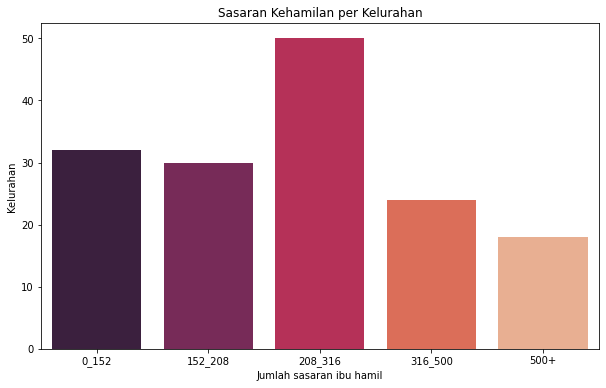

In [ ]:
x = ["0_152","152_208","208_316","316_500","500+"]
y = [len(Kelurahan34_152.values),len(Kelurahan154_208.values),len(Kelurahan211_316.values),len(Kelurahan323_500.values),len(Kelurahan500above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Sasaran Kehamilan per Kelurahan")
plt.xlabel("Jumlah sasaran ibu hamil")
plt.ylabel("Kelurahan")
plt.show()

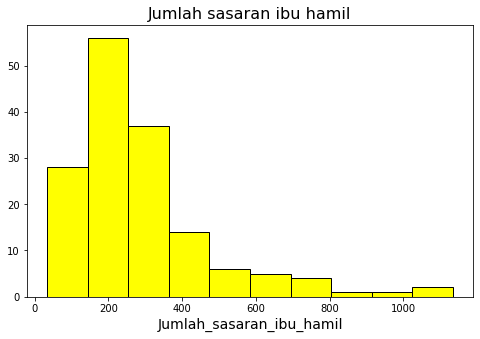

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Jumlah sasaran ibu hamil",fontsize=16)
plt.xlabel ("Jumlah_sasaran_ibu_hamil",fontsize=14)
plt.hist(df['Jumlah_sasaran_ibu_hamil'],color='yellow',edgecolor='black')
plt.show()

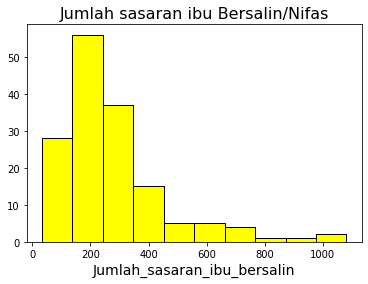

In [ ]:
#plt.figure(figsize=(8,5))
plt.title("Jumlah sasaran ibu Bersalin/Nifas",fontsize=16)
plt.xlabel ("Jumlah_sasaran_ibu_bersalin",fontsize=14)
plt.hist(df['Jumlah_sasaran_ibu_bersalin'],color='yellow',edgecolor='black')
plt.show()

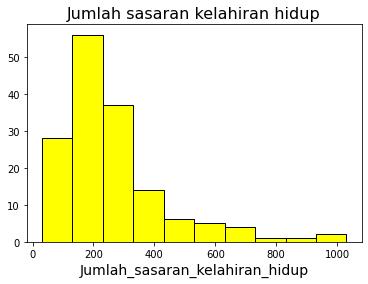

In [ ]:
#plt.figure(figsize=(8,5))
plt.title("Jumlah sasaran kelahiran hidup",fontsize=16)
plt.xlabel ("Jumlah_sasaran_kelahiran_hidup",fontsize=14)
plt.hist(df['Jumlah_sasaran_kelahiran_hidup'],color='yellow',edgecolor='black')
plt.show()

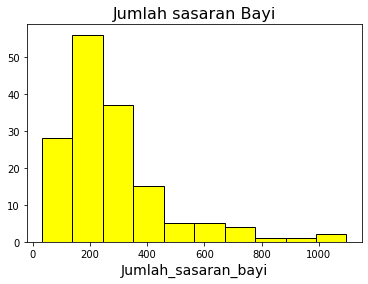

In [ ]:
#plt.figure(figsize=(8,5))
plt.title("Jumlah sasaran Bayi",fontsize=16)
plt.xlabel ("Jumlah_sasaran_bayi",fontsize=14)
plt.hist(df['Jumlah_sasaran_bayi'],color='yellow',edgecolor='black')
plt.show()

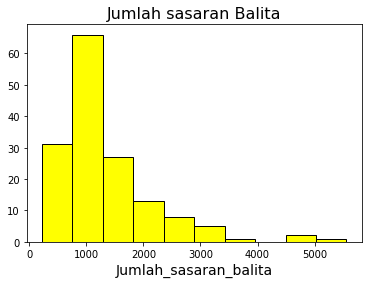

In [ ]:
#plt.figure(figsize=(8,5))
plt.title("Jumlah sasaran Balita",fontsize=16)
plt.xlabel ("Jumlah_sasaran_balita",fontsize=14)
plt.hist(df['Jumlah_sasaran_balita'],color='yellow',edgecolor='black')
plt.show()

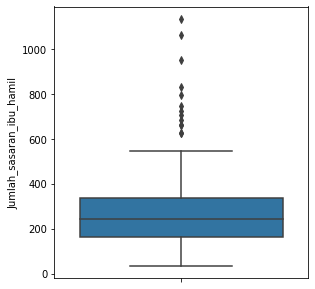

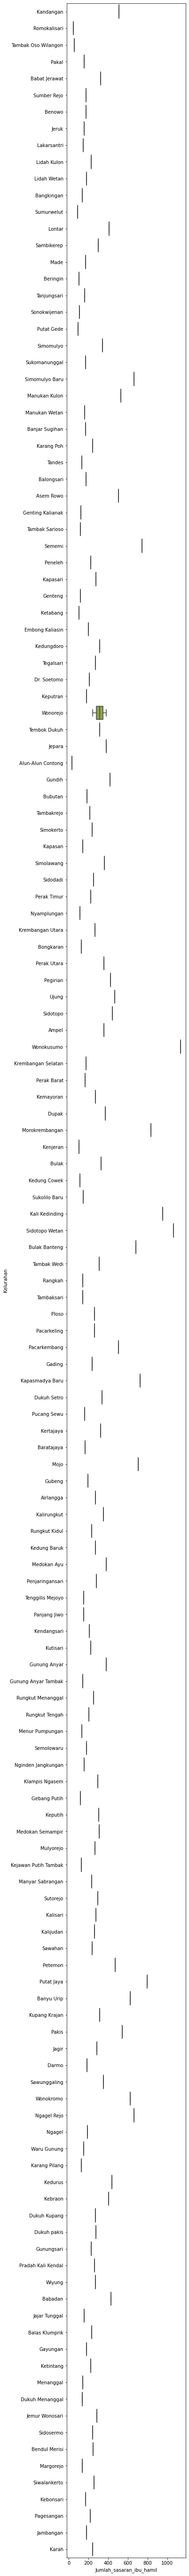

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(y=df["Jumlah_sasaran_ibu_hamil"])
plt.figure(figsize=(10,100))
plt.subplot(122)
sns.boxplot(x=df['Jumlah_sasaran_ibu_hamil'],y=df["Kelurahan"])

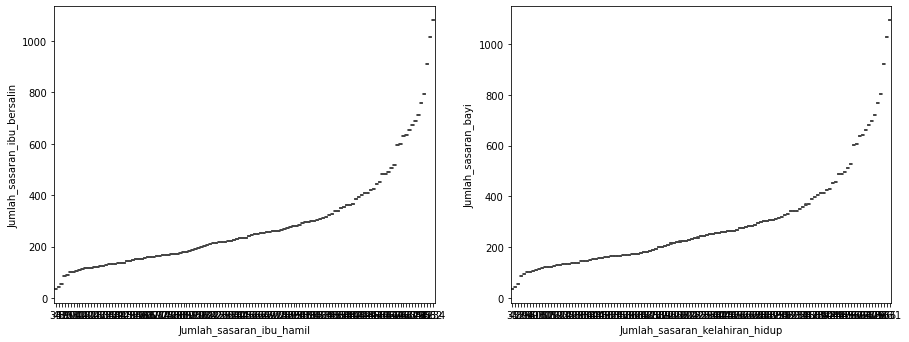

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.boxplot(x=df['Jumlah_sasaran_ibu_hamil'],y=df["Jumlah_sasaran_ibu_bersalin"])
plt.subplot(222)
sns.boxplot(x=df['Jumlah_sasaran_kelahiran_hidup'],y=df["Jumlah_sasaran_bayi"])
plt.show()

In [ ]:
categorical_variabel = df.select_dtypes('object')
cat_subset = categorical_variabel.drop(['Kelurahan'],axis=1)

In [ ]:
for col in cat_subset:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.tight_layout()

## 4. Preprocessing data

In [ ]:
label_encoder = LabelEncoder() 
encoded_data = df2[cat_subset.columns]

In [ ]:
encoded_data.head()

""
0
1
2
3
4


In [ ]:
cluster_data = pd.concat([encoded_data, df2[["Kelurahan", "Total"]]], axis=1)

In [ ]:
scaler = StandardScaler()
cluster_data["Total"] = scaler.fit_transform(cluster_data["Total"].values.reshape(-1, 1))

In [ ]:
cluster_data.head()

,Kelurahan,Total
0,Kandangan,0.864927
1,Romokalisari,-1.310352
2,Tambak Oso Wilangon,-1.224082
3,Pakal,-0.676428
4,Babat Jerawat,0.286599


## 5. Membangun K-means model

In [ ]:
cluster = KMeans(n_clusters=3)
cluster.fit(cluster_data)

KMeans(n_clusters=3)

In [ ]:
#membuat kolom baru untuk kelompok
segment = pd.Series(cluster.labels_, name="segment")

In [ ]:
pd.concat([df2, segment], axis=1)

,Kelurahan,Jumlah_sasaran_ibu_hamil,Jumlah_sasaran_ibu_bersalin/nifas,Jumla_sasaran_kelahiran_hidup,Jumlah_sasaran_bayi,Jumlah_sasaran_balita,Total,segment
0,1,512,489,465,495,1843,3804,2
1,2,45,43,42,44,226,400,0
2,3,57,54,52,55,317,535,0
3,4,158,151,144,153,786,1392,0
4,5,324,309,294,313,1659,2899,2
...,...,...,...,...,...,...,...,...
149,150,256,245,233,248,1243,2225,0
150,151,169,161,153,163,828,1474,0
151,152,221,211,202,214,1082,1930,0
152,153,179,171,163,173,837,1523,0


### 5.1 K optimum

In [ ]:
wcss = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    wcss.append(km.inertia_)

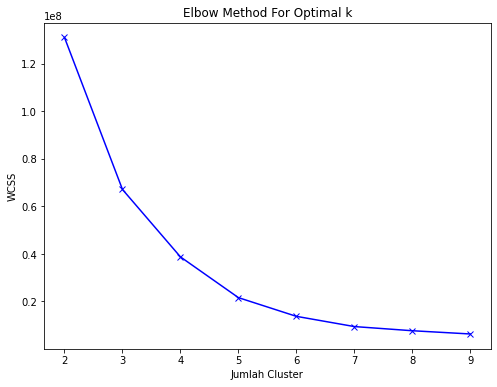

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

Kesimpulan Dengan memanfaatkan nilai WCSS maka kita bisa mengambil keputusan jumlah segmentasi optimal yang kita gunakan.

In [ ]:
#cluster = KMeans(n_clusters=3)
cluster.fit(cluster_data)

KMeans(n_clusters=3)

### Eksplorasi hasil segmentasi pelanggan

In [ ]:
segment = pd.Series(cluster.labels_, name="segment")

In [ ]:
results = pd.concat([df2, segment], axis=1)

In [ ]:
#pd.concat([df2, segment], axis=1)
results[results["segment"]==0].head()

,Kelurahan,Jumlah_sasaran_ibu_hamil,Jumlah_sasaran_ibu_bersalin/nifas,Jumla_sasaran_kelahiran_hidup,Jumlah_sasaran_bayi,Jumlah_sasaran_balita,Total,segment
0,1,512,489,465,495,1843,3804,0
4,5,324,309,294,313,1659,2899,0
13,14,411,392,373,397,2191,3764,0
14,15,298,284,271,288,1497,2638,0
20,21,343,328,312,332,1577,2892,0


In [ ]:
results[results["segment"]==1].head()

,Kelurahan,Jumlah_sasaran_ibu_hamil,Jumlah_sasaran_ibu_bersalin/nifas,Jumla_sasaran_kelahiran_hidup,Jumlah_sasaran_bayi,Jumlah_sasaran_balita,Total,segment
22,23,661,631,600,639,3151,5682,1
32,33,744,710,676,719,2974,5823,1
62,63,1134,1082,1031,1096,5556,9899,1
67,68,832,794,756,804,3478,6664,1
72,73,953,909,866,921,4684,8333,1


In [ ]:
results[results["segment"]==2].head()

,Kelurahan,Jumlah_sasaran_ibu_hamil,Jumlah_sasaran_ibu_bersalin/nifas,Jumla_sasaran_kelahiran_hidup,Jumlah_sasaran_bayi,Jumlah_sasaran_balita,Total,segment
1,2,45,43,42,44,226,400,2
2,3,57,54,52,55,317,535,2
3,4,158,151,144,153,786,1392,2
5,6,178,170,162,172,945,1627,2
6,7,176,168,160,170,890,1564,2


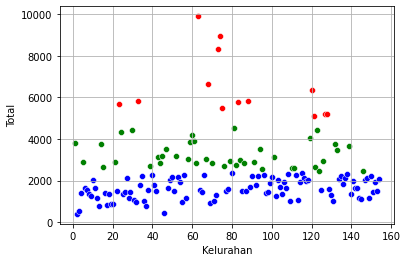

In [ ]:
sns.scatterplot(x=results[results["segment"]==0].Kelurahan, y=results[results["segment"]==0].Total, color="green")
sns.scatterplot(x=results[results["segment"]==1].Kelurahan, y=results[results["segment"]==1].Total, color="red")
sns.scatterplot(x=results[results["segment"]==2].Kelurahan, y=results[results["segment"]==2].Total, color="blue")
plt.grid(True)

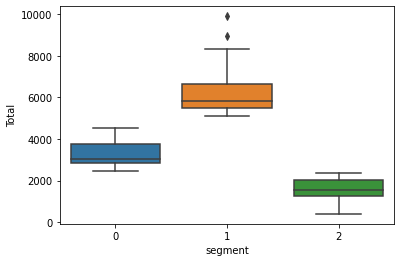

In [ ]:
sns.boxplot(x=results['segment'],y=results["Total"])

In [ ]:
sum_row = df.sum(axis=1)
print (sum_row)

0      3804
1       400
2       535
3      1392
4      2899
       ... 
149    2225
150    1474
151    1930
152    1523
153    2071
Length: 154, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df3.sort_values(["Total","Kelurahan"],axis=0, ascending=True,inplace=True,na_position='first')
df3.loc[:, :]

,Kelurahan,Jumlah sasaran ibu hamil,Jumlah sasaran ibu bersalin/nifas,Jumlah sasaran kelahiran hidup,Jumlah sasaran bayi,Jumlah sasaran balita,Total
1,Romokalisari,45,43,42,44,226,400
45,Alun-Alun Contong,34,33,31,33,310,441
2,Tambak Oso Wilangon,57,54,52,55,317,535
36,Ketabang,104,100,95,101,404,804
12,Sumurwelut,89,85,80,86,464,804
...,...,...,...,...,...,...,...
119,Putat Jaya,795,759,723,769,3327,6373
67,Morokrembangan,832,794,756,804,3478,6664
72,Kali Kedinding,953,909,866,921,4684,8333
73,Sidotopo Wetan,1062,1014,966,1027,4863,8932
